# Tutorial 3 (Introduction to AI)

# Regression

## Linear regression: supervised learning example

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to (x,y) data. We will use the following simple data for our regression example:

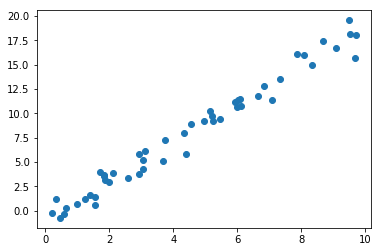

In [2]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#### Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class. So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [3]:
from sklearn.linear_model import LinearRegression

#### Choose model hyperparameters

As we have seen before, once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., y-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made *once the model class is selected*. These choices are often represented as hyperparameters, or parameters that must be set before the model is fit to data. In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.

For our linear regression example, we can instantiate the *LinearRegression* class and specify that we would like to fit the intercept using the *fit_intercept* hyperparameter:

In [5]:
model = LinearRegression(fit_intercept=True)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


You can read up on this in the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

#### Arrange data into a features matrix and target vector

Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array. Here our target variable *y* is already in the correct form (a length-*n_samples* array), but we need to massage the data x to make it a matrix of size *[n_samples, n_features]*. In this case, this amounts to a simple reshaping of the one-dimensional array:

In [7]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### Fit the model to your data

Now it is time to apply our model to data. This can be done with the **fit()** method of the model:

In [8]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

This **fit()** command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the **fit()** process have trailing underscores; for example in this linear model, we have the following:

In [9]:
model.coef_

array([1.9776566])

In [10]:
model.intercept_

-0.9033107255311164

These two parameters represent the slope and intercept of the simple linear fit to the data. Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

####  Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the predict() method. For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts:

In [11]:
xfit = np.linspace(-1, 11)

As before, we need to coerce these x values into a *[n_samples, n_features]* features matrix, after which we can feed it to the model:

In [12]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

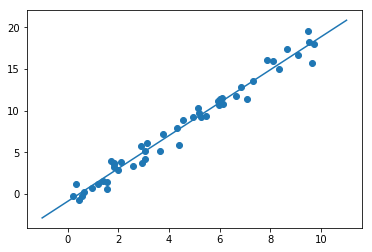

In [13]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

## Linear Regression with auto-mpg

Now let's work through an example with larger dataset with more features.  In the auto-mpg dataset which we worked with in Week 1, can a linear regression model be constructed so that the miles per gallon fuel usage can be predicted from other features?

First, let us import the dataset, and print out the first five rows.

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

path = "../ex1/" 

filename_read = os.path.join(path, "auto-mpg.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

print(df[:5])

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


We now should check the integrity of the data.  Are they any missing values?

In [15]:
print(df.isnull().any())

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool


Observe that 'horsepower' has missing values.  These should be replaced.  One tactic to do this is to replace the missing value with the median of the values for that feature.  This is done below, and again we check whether there are null value.  This time there are not.

In [16]:
med = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(med)
#df = df.dropna() #you can also simply drop NA values

print(df.isnull().any())

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool


Notice that one of the features, 'name', is not a numeric value.  Regression can't work with this text field, so we need to do something with it.  Perhaps we might encode the car names as  integer values, but here we will simply drop the field.

Next, define X and y, the feature data and the target data.

In [18]:
# Strip non-numeric features from the dataframe
df = df.select_dtypes(include=['int', 'float'])

#print to check that this has worked
print(df[:5]) 

#collect the columns names for non-target features
result = []
for x in df.columns:
    if x != 'mpg':
        result.append(x)
   
X = df[result].values
y = df['mpg'].values

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  


Split the data into training and test, and build a linear regression model, again calling **fit()**

The values of the coefficients of the linear regression model are printed below.

In [19]:
#split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# build the model
model = LinearRegression()  
model.fit(X_train, y_train)

print(model.coef_)

[-0.30958288  0.02106943 -0.02088593 -0.00650729  0.19986328  0.74059199
  1.62910052]


Let's do a side-by-side comparison of the actual *mpg* values and those predicted by the model.  The code below prints the first 25 rows.

In [20]:
#calculate the predictions of the linear regression model
y_pred = model.predict(X_test)

#build a new data frame with two columns, the actual values of the test data, 
#and the predictions of the model
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_head = df_compare.head(25)
print(df_head)

    Actual  Predicted
0     14.0  12.925224
1     25.0  23.954718
2     13.0  11.690225
3     21.0  21.086586
4     18.0  17.375781
5     35.0  29.928875
6     34.1  33.316870
7     20.0  23.531880
8     15.0  14.234262
9     23.5  26.413747
10    40.9  33.142776
11    37.2  34.010977
12    18.0  21.424156
13    23.0  26.808465
14    15.5  16.168304
15    35.7  30.228760
16    31.0  28.612168
17    27.0  28.741884
18    18.0  17.430634
19    37.3  30.601011
20    15.5  15.452486
21    23.0  24.607082
22    24.0  27.032040
23    18.0  19.885526
24    34.5  29.155823


Observe that, as you would expect from a regression model, the predictions lie either side of the actual values.

Now let's consider this in a couple of different ways.  

Firstly, let's plot these 25 data points to give a visual comparision of actual values and the predictions of the regression model.

Secondly, let's consider this statistically.  The mean *mpg* value is given, and the Root Mean Squared Error (RMSE) is also given.

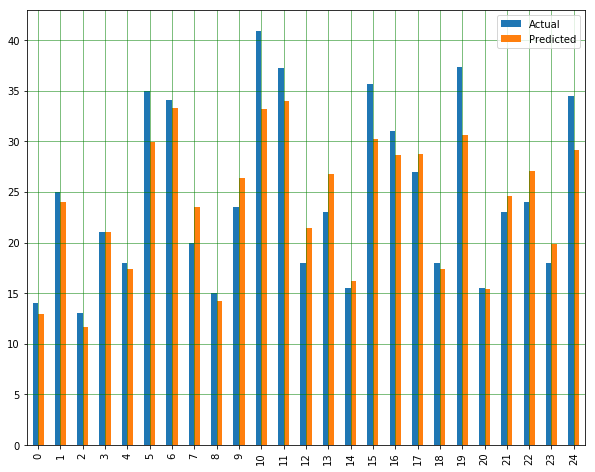

Mean: 23.695
Root Mean Squared Error: 3.4092137158417337


In [21]:
df_head.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean:', np.mean(y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The RMSE is a commonly used measure for regression models.  There's not a hard and fast rule as to what a good score is, but less than 10% of the means is often quoted as being a reasonably good score.  You can see here that the RMSE is higher than this, so the model might perhaps be improved on, but the visualisation also indicated that the model is not completely inaccurate.  You might consider how to improve the regression model: perhaps omit some features? or normalise the data in some sense?

Finally, we add a function (method) to the code that will produce a regression chart, and then call this on the first 100 datapoints.

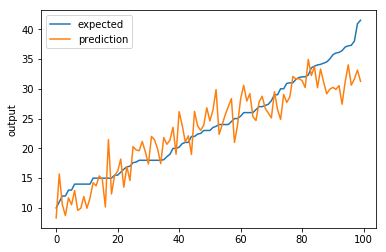

In [22]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
chart_regression(y_pred[:100].flatten(),y_test[:100],sort=True)   